---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo semestre del 2021

* Estudiante: **Juan Ignacio Montealegre Salazar**
* Carné: **B95001**
* Grupo: **1**

# `L4` - *Procesos aleatorios*


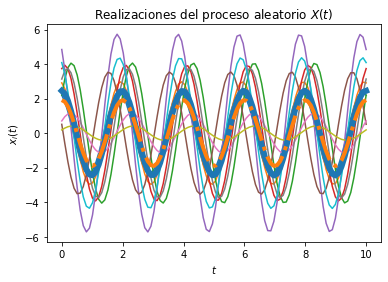

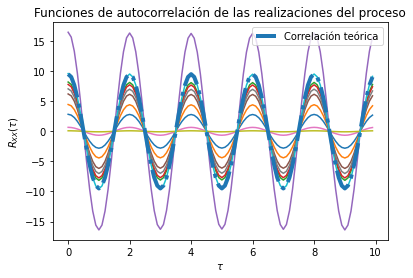

In [1]:
# Base para la solución del Laboratorio 4

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias A y Z
vaA = stats.norm(3, np.sqrt(10))
vaZ = stats.uniform(-np.pi/2, np.pi)

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (A y Z independientes)
for i in range(N):
	A = vaA.rvs()
	Z = vaZ.rvs()
	x_t = A * np.cos(np.pi*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 6/np.pi * np.cos(np.pi*t)
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 19/2 * np.cos(np.pi*taus)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()

Valor teórico de la media E: 
[ 3.18309886  2.03093699  0.67597029 -0.7464973  -2.09442133 -3.23320113
 -4.04912069 -4.46070411 -4.4268516  -3.95094357 -3.08050316 -1.90245058
 -0.53442355  0.88696983  2.21979238  3.33095143  4.10948912  4.4776624
  4.39870633  3.88050528  2.97480565  1.77204857  0.39233869 -1.02654926
 -2.3429283  -3.42534775 -4.16571963 -4.49011207 -4.36613195 -3.80615965
 -2.86611276 -1.63986226 -0.24985877  1.16509505  2.46370508  3.51629503
  4.21775562  4.49804057  4.32916123  3.72798154  2.75453394  1.50602474
  0.10712728 -1.30246768 -2.58200112 -3.6037017  -4.26554469 -4.50143992
 -4.28783142 -3.64604967 -2.64018154 -1.37067079  0.03571209  1.43852883
  2.69769731  3.68747975  4.30903872  4.50030671  4.24218413  3.56044653
  2.5231707   1.23393668 -0.1785155  -1.57314151 -2.81067714 -3.76754482
 -4.34819391 -4.49464207 -4.19226532 -3.47125833 -2.40361924 -1.09596011
  0.32113915  1.70617017  2.92082686  3.8438163   4.38297083  4.4844517
  4.13812525  3.3785748

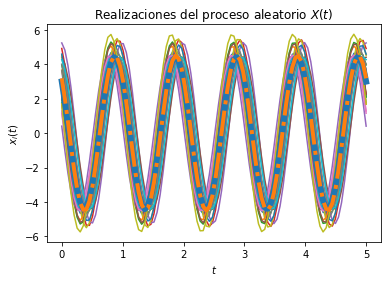

Valor teórico de la correlación Rxx: 
[ 2.25000000e+01 -6.78348053e-02 -1.81182159e+01  1.24246023e-01
  6.68017025e+00  5.66389819e-03  7.35769532e+00 -3.02658122e-01
 -1.85267514e+01  6.16484927e-01  2.24773501e+01 -7.37882989e-01
 -1.76733730e+01  5.14001582e-01  5.98974490e+00  5.09408711e-02
  8.01959194e+00 -7.64991861e-01 -1.88973346e+01  1.31232069e+00
  2.24094916e+01 -1.39096158e+00 -1.71940139e+01  8.65039146e-01
  5.28919937e+00  1.41312502e-01  8.66319490e+00 -1.26089354e+00
 -1.92284731e+01  2.01687061e+00  2.22966978e+01 -2.02444085e+00
 -1.66820690e+01  1.17594521e+00  4.58135449e+00  2.76414898e-01
  9.28591263e+00 -1.78836634e+00 -1.95188336e+01  2.72729770e+00
  2.21394229e+01 -2.63577002e+00 -1.61395995e+01  1.44546787e+00
  3.86906052e+00  4.55704047e-01  9.88523767e+00 -2.34528630e+00
 -1.97672470e+01  3.44074133e+00  2.19383001e+01 -3.22248746e+00
 -1.55687898e+01  1.67252185e+00  3.15518562e+00  6.78458016e-01
  1.04587567e+01 -2.92941092e+00 -1.99727130e+01  4.

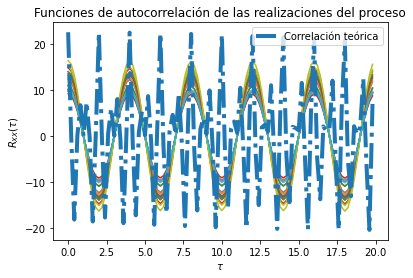

In [2]:
#Código base modificado para solucionar problema 4 de de la práctica E13
'''
Parte a) Suponiendo que Ω no es una variable aleatoria, 
sino una constante omega. Encuentre el valor medio
 Los parámetros T, t_final y N son elegidos arbitrariamente
'''
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias C y Z
vaC = stats.norm(5, np.sqrt(0.2))
vaZ = stats.uniform(0, np.pi/2)

#Constante Omega
Omega = 2*np.pi

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 5# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 20
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (C y Z independientes)
for i in range(N):
	C = vaC.rvs()
	Z = vaZ.rvs()
	x_t = C * np.cos(Omega*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = (10/np.pi) * (np.cos(Omega*t)-np.sin(Omega*t))
print ("Valor teórico de la media E: ")
print(E)
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

'''Parte b) Suponga ahora que Ω y Θ son constantes, no variables aleatorias
Obtenga el valor teórico de la correlación'''
Z = 0
# Se redefinen las muestras del proceso x(t) (C y Z independientes)
for i in range(N):
	C = vaC.rvs()
	Z = vaZ.rvs()
	x_t = C * np.cos(Omega*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 25.2 * np.cos(Omega*t+Z) * np.cos(Omega*(t+taus)+Z)
print ("Valor teórico de la correlación Rxx: ")
print(Rxx)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()
